<ipython-input-12-185f663542c0>:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  date_rng = pd.date_range(start='1/1/2000', end='12/31/2023', freq='M')


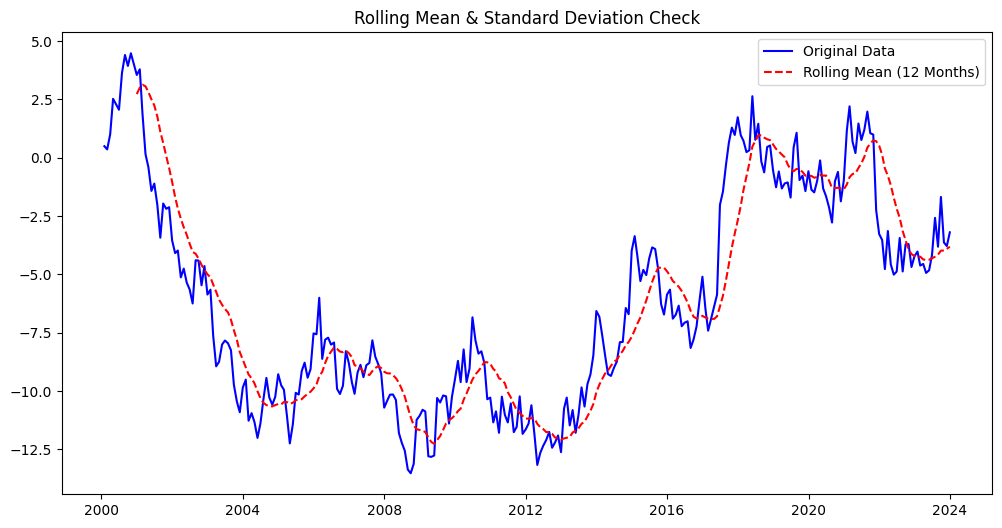

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(42)
date_rng = pd.date_range(start='1/1/2000', end='12/31/2023', freq='M')
data = np.cumsum(np.random.randn(len(date_rng)))

df = pd.DataFrame(data, index=date_rng, columns=['Value'])

rolling_mean = df['Value'].rolling(window=12).mean()
rolling_std = df['Value'].rolling(window=12).std()

plt.figure(figsize=(12, 6))
plt.plot(df['Value'], label='Original Data', color='blue')
plt.plot(rolling_mean, label='Rolling Mean (12 Months)', color='red', linestyle='dashed')

plt.title("Rolling Mean & Standard Deviation Check")
plt.legend()
plt.show()


In [ ]:
from statsmodels.tsa.stattools import adfuller


adf_test = adfuller(df['Value'])


print("Augmented Dickey-Fuller Test Results:")
print(f"ADF Statistic: {adf_test[0]}")
print(f"P-Value: {adf_test[1]}")
print(f"Critical Values: {adf_test[4]}")


if adf_test[1] < 0.05:
    print("Conclusion: The time series is STATIONARY (Reject H0)")
else:
    print("Conclusion: The time series is NON-STATIONARY (Fail to reject H0)")


Augmented Dickey-Fuller Test Results:
ADF Statistic: -1.9463550371834673
P-Value: 0.31057805422631196
Critical Values: {'1%': -3.4534232986669546, '5%': -2.8716994185534745, '10%': -2.5721833625116144}
Conclusion: The time series is NON-STATIONARY (Fail to reject H0)


In [ ]:

df['Differenced'] = df['Value'].diff().dropna()

adf_diff_test = adfuller(df['Differenced'].dropna())

print("\nADF Test After Differencing:")
print(f"ADF Statistic: {adf_diff_test[0]}")
print(f"P-Value: {adf_diff_test[1]}")
if adf_diff_test[1] < 0.05:
    print("Conclusion: The Differenced Series is STATIONARY")
else:
    print("Conclusion: The Differenced Series is STILL NON-STATIONARY")



ADF Test After Differencing:
ADF Statistic: -18.26532525350131
P-Value: 2.3261222887548313e-30
Conclusion: The Differenced Series is STATIONARY
